In [1]:
# General
import imp
import dill as pickle
import string
import collections 
import json

# Tools
import pandas as pd
import numpy as np
import re

import nltk
from alphabet_detector import AlphabetDetector

In [2]:
import sys
sys.path.append('/home/tonko22/PycharmProjects/TelegramGroupAnalysis/')

import preprocessing
import Dictionary.stopword_lists

In [3]:
 # Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
# Setting figure size in inches
rcParams['figure.figsize'] = (16, 5)

In [4]:
python_json_path = '/home/tonko22/PycharmProjects/TelegramGroupAnalysis/ru_python.json'
python_beginners_json_path = '/home/tonko22/PycharmProjects/TelegramGroupAnalysis/ru_python_beginners.json.json'

In [5]:
# Reading the json as a dict
with open(python_json_path) as json_data:
    python_data = json.load(json_data)
    print(type(python_data))
python_data.keys()

<class 'dict'>


dict_keys(['rows', 'meta', 'data', 'statistics'])

In [6]:
python_df = pd.DataFrame(python_data['data'])
python_df.head()

,msg_id,reply_to_msg,text
0,3,0,Ура
1,13,0,то есть 200 рыл не нужно было?
2,16,0,Это. А кто в чём статьи для Хабра готовит?
3,23,16,Хабр не умеет в маркдаун?
4,25,24,И у вас?


In [7]:
pp = preprocessing.Preprocessing()

Preprocessing  loaded


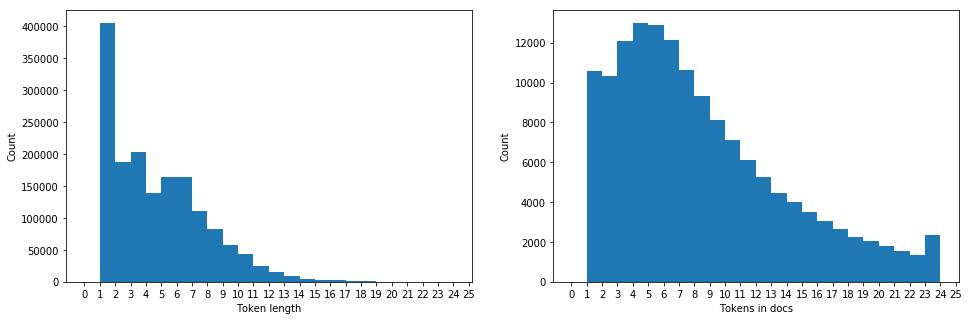

In [8]:
raw = python_df['text'].apply(pp.normalize)
tokenized = raw.apply(nltk.word_tokenize)
pp.plot_token_distribution(tokenized);

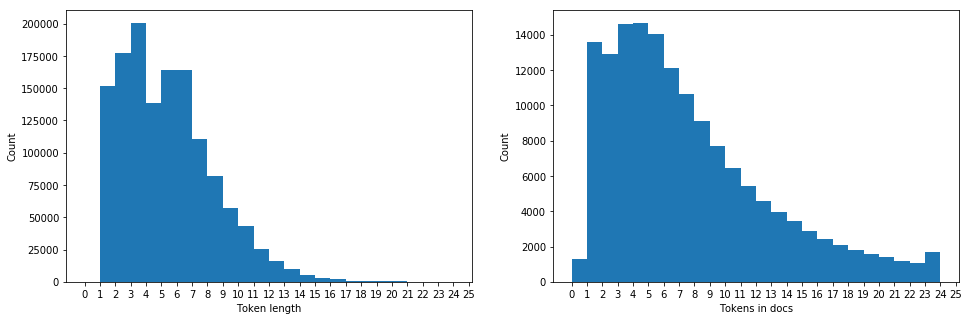

In [9]:
no_punct = tokenized.apply(pp.remove_punct)
pp.plot_token_distribution(no_punct);

In [10]:
 # Most frequent tokens
freq_df = pp.get_token_frequencies_df(no_punct, topn=None)
freq_df.head(15)

,count,token
0,38699,не
1,35925,в
2,32918,и
3,21833,на
4,20703,что
5,19764,а
6,19106,я
7,18680,это
8,13339,с
9,12007,как


In [11]:
no_stops = no_punct.apply(pp.remove_stopwords, args=[
    preprocessing.stopword_lists.yandex_seo_stopwords+['ну',
        'там', 'можно', 'просто', 'надо', 'про', 'тут',
        'вообще', 'тоже', 'нужно', 'лучше', 'где', 'без',
        'почему', 'даже', 'тогда', 'через', 'потом', 'ли',
        'вроде', 'что-то', 'потому', 'очень', 'раз', 'как-то',
        'какой-то', 'кто-то', 'т.е', 'из-за', 'где-то', 'что-то',
        'какие-то', 'кто-нибудь', 'какая-то', 'какой-нибудь',
        'по-моему', 'что-нибудь', 'почему-то', 'так-то',  
        'т.к', 'т.д', 'какое-то', 'так-то',                                                
                                                      ]])

In [12]:
freq_df = pp.get_token_frequencies_df(no_stops, topn=None)
freq_df.head(15)

,count,token
0,2001,питон
1,1992,зачем
2,1969,спасибо
3,1882,вопрос
4,1737,сейчас
5,1689,сделать
6,1679,работает
7,1623,питоне
8,1608,код
9,1543,делать


In [13]:
categ_df = pp.get_categories_df(no_stops)
category_frequency_df = pp.most_common_in_df(categ_df)
category_frequency_df.head(50) # wtf, some punct left

,num_punct,punct_tokens,alpha_punct,alpha_num_punct,alpha_num,alpha_tokens,numeric_tokens
0,"(2.7, 175)","(_/¯, 29)","(с++, 146)","(utf-8, 52)","(1с, 107)","(питон, 2001)","(1, 1216)"
1,"(+1, 149)","(¯\_, 27)","(c++, 120)","('utf-8, 23)","(pep8, 101)","(зачем, 1992)","(2, 1104)"
2,"(3.5, 128)","(—-, 3)","(о_о, 120)","(python3.6, 15)","(python3, 87)","(спасибо, 1969)","(3, 866)"
3,"(3.6, 123)","(～`, 2)","(какую-то, 119)","(http/2, 13)","(пеп8, 67)","(вопрос, 1882)","(10, 584)"
4,"(:3, 106)","(/¯, 2)","(кому-то, 117)","(pep-8, 13)","(10к, 59)","(сейчас, 1737)","(0, 536)"
5,"(2., 103)","(-—, 2)","(кого-то, 102)","(python3.5, 12)","(pip3, 48)","(сделать, 1689)","(5, 504)"
6,"(1., 100)","(.±, 2)","(чего-то, 100)","(2.х, 12)","(100к, 48)","(работает, 1679)","(4, 417)"
7,"(-1, 71)","(¯\, 2)","(когда-то, 99)","(a-za-z0-9, 10)","(3к, 40)","(питоне, 1623)","(100, 399)"
8,"(3.4, 56)","(😁.👍, 1)","(все-таки, 95)","(3.х, 9)","(2к, 40)","(код, 1608)","(8, 270)"
9,"(3., 55)","(..😐, 1)","(чем-то, 91)","(90-х, 9)","(1к, 36)","(делать, 1543)","(20, 214)"


In [14]:
bad_categories =  ['punct_tokens']
punct_tokens = category_frequency_df[bad_categories].dropna()
no_punct = no_stops.apply(pp.remove_stopwords, args=[list(punct_tokens)])
pp.stats_for_series(no_punct)

,Total tokens,Unique tokens,Total texts,Empty texts,Empty tokens
Count,765287,119646,157919,5970,0


In [15]:
no_punct = pp.drop_empty_text_rows(no_punct)

In [16]:
freq_df = pp.get_token_frequencies_df(no_punct)
freq_df['len'] = freq_df['token'].map(len)
freq_df[freq_df['len']>11].head(20)
# All good, no long trash tokens

,count,token,len
44,847,использовать,12


In [17]:
lemmatized = pp.lemmatize_series(no_punct) # Mystem
pp.stats_for_series(lemmatized)

Building lemma-dictionary


,Total tokens,Unique tokens,Total texts,Empty texts,Empty tokens
Count,765287,65569,151949,0,0


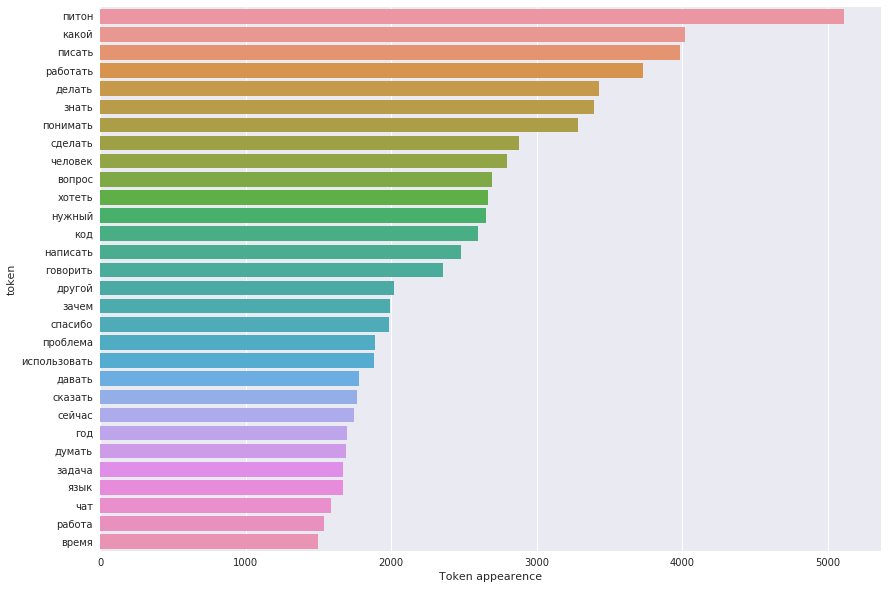

In [18]:
sns.set(rc={"figure.figsize": (14, 10)})
pp.plot_token_frequencies(lemmatized)

In [19]:
lemmatized.head(3)

0                        [ура]
1                  [200, рыть]
2    [статья, хабра, готовить]
Name: text, dtype: object

In [20]:
python_df['preprocessed'] = lemmatized
final_df = python_df.dropna()
final_df.head()

,msg_id,reply_to_msg,text,preprocessed
0,3,0,Ура,[ура]
1,13,0,то есть 200 рыл не нужно было?,"[200, рыть]"
2,16,0,Это. А кто в чём статьи для Хабра готовит?,"[статья, хабра, готовить]"
3,23,16,Хабр не умеет в маркдаун?,"[хабр, уметь, маркдаун]"
5,26,13,дуров помог,"[дуров, помогать]"


In [21]:
dataset_path = '../TelegramGroupAnalysis/python_dataset'
final_df.to_pickle(path=dataset_path)